In [164]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [165]:
pwd = os.getcwd()
file_path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')

In [166]:
data = pd.read_csv(file_path, parse_dates=["Start", "End"])

In [167]:
data_modified = data.copy()

In [168]:
user_agg_engagement = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'Bearer Id':'count', "Dur. (ms)": "sum", "Total UL (Bytes)": "sum", "Total DL (Bytes)": "sum",  "Social Media UL (Bytes)": "sum", "Social Media DL (Bytes)": "sum", "Google UL (Bytes)": "sum", "Google DL (Bytes)": "sum", "Email UL (Bytes)": "sum", "Email DL (Bytes)": "sum", "Youtube UL (Bytes)": "sum", "Youtube DL (Bytes)": "sum", "Netflix UL (Bytes)": "sum", "Netflix DL (Bytes)": "sum", "Gaming UL (Bytes)": "sum", "Gaming DL (Bytes)": "sum", "Other UL (Bytes)": "sum", "Other DL (Bytes)": "sum"})
user_agg_engagement.reset_index(drop=True, inplace=True)

In [169]:
user_agg_engagement["MSISDN/Number"] = user_agg_engagement["MSISDN/Number"].astype(str)

In [170]:
user_agg_engagement.rename(columns={"Bearer Id": "Session Count"}, inplace=True)

In [171]:
user_agg_engagement["Total Data Transferred"] = user_agg_engagement["Total UL (Bytes)"] + user_agg_engagement["Total DL (Bytes)"]

In [172]:
user_agg_engagement["Google Volume (Bytes)"] = user_agg_engagement["Google UL (Bytes)"] + user_agg_engagement["Google DL (Bytes)"]
user_agg_engagement["Netflix Volume (Bytes)"] = user_agg_engagement["Netflix UL (Bytes)"] + user_agg_engagement["Netflix DL (Bytes)"]
user_agg_engagement["Youtube Volume (Bytes)"] = user_agg_engagement["Youtube UL (Bytes)"] + user_agg_engagement["Youtube DL (Bytes)"]
user_agg_engagement["Gaming Volume (Bytes)"] = user_agg_engagement["Gaming UL (Bytes)"] + user_agg_engagement["Gaming DL (Bytes)"]
user_agg_engagement["Email Volume (Bytes)"] = user_agg_engagement["Email UL (Bytes)"] + user_agg_engagement["Email DL (Bytes)"]
user_agg_engagement["Social Media Volume (Bytes)"] = user_agg_engagement["Social Media UL (Bytes)"] + user_agg_engagement["Social Media DL (Bytes)"]
user_agg_engagement["Other Volume (Bytes)"] = user_agg_engagement["Other UL (Bytes)"] + user_agg_engagement["Other DL (Bytes)"]

In [173]:
volume_per_user = user_agg_engagement.drop(columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Social Media UL (Bytes)",
    "Social Media DL (Bytes)",
    "Google UL (Bytes)",
    "Google DL (Bytes)",
    "Email UL (Bytes)",
    "Email DL (Bytes)",
    "Youtube UL (Bytes)",
    "Youtube DL (Bytes)",
    "Netflix UL (Bytes)",
    "Netflix DL (Bytes)",
    "Gaming UL (Bytes)",
    "Gaming DL (Bytes)",
    "Other UL (Bytes)",
    "Other DL (Bytes)"
])

In [174]:
# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [175]:
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (ms),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33601001722.0,1,116720.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,33601001754.0,1,181230.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,33601002511.0,1,134969.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,33601007832.0,1,49878.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,33601008617.0,2,37104.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00


In [176]:
plt.style.use('seaborn')

In [177]:
kmeans = KMeans(n_clusters=3)

In [178]:
engagement_metrics = volume_per_user[["Session Count", "Dur. (ms)", "Total Data Transferred"]]

In [179]:
engagement_metrics

,Session Count,Dur. (ms),Total Data Transferred
0,1,116720.00,878690574.00
1,1,181230.00,156859643.00
2,1,134969.00,595966483.00
3,1,49878.00,422320698.00
4,2,37104.00,1457410944.00
...,...,...,...
106466,1,8810.00,714641641.00
106467,1,140988.00,480307335.00
106468,1,877385.00,232123971.00
106469,1,253030.00,596287824.00


In [180]:
kmeans.fit_predict(engagement_metrics)

array([0, 2, 0, ..., 2, 0, 2], dtype=int32)

In [181]:
kmeans.cluster_centers_

array([[1.38691335e+00, 1.38939017e+05, 8.26169584e+08],
       [3.12285950e+00, 3.74200626e+05, 1.83940317e+09],
       [1.06023456e+00, 1.08944545e+05, 3.32553102e+08]])

In [182]:
kmeans.cluster_centers_[0]

array([1.38691335e+00, 1.38939017e+05, 8.26169584e+08])

In [183]:
least_eng = kmeans.cluster_centers_[0]
eng_distances = []
for index,row in engagement_metrics.iterrows():
    x = row['Session Count']
    y = row['Dur. (ms)']
    z = row['Total Data Transferred']

    ec_dis = ( (x - least_eng[0])**2 + (y - least_eng[1])**2 + (z - least_eng[2])**2)**0.5

    eng_distances.append(ec_dis)

In [184]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'TCP DL Retrans. Vol (Bytes)':'sum', "TCP UL Retrans. Vol (Bytes)": "sum", "Avg RTT DL (ms)": "sum", "Avg RTT UL (ms)": "sum",  "Avg Bearer TP DL (kbps)": "sum", "Avg Bearer TP UL (kbps)": "sum", 'Handset Type': 'first' })
user_agg.reset_index(drop=True, inplace=True)

In [185]:
user_agg["MSISDN/Number"] = user_agg["MSISDN/Number"].astype(str)

In [186]:
transmission_per_user = pd.DataFrame()
transmission_per_user["MSISDN/Number"] = user_agg["MSISDN/Number"]
transmission_per_user["Average TCP Retransmission"] = user_agg["TCP DL Retrans. Vol (Bytes)"] + user_agg["TCP UL Retrans. Vol (Bytes)"]
transmission_per_user["Average RTT"] = user_agg["Avg RTT DL (ms)"] + user_agg["Avg RTT UL (ms)"]
transmission_per_user["Average throughput"] = user_agg["Avg Bearer TP DL (kbps)"] + user_agg["Avg Bearer TP UL (kbps)"]
transmission_per_user["Handset Type"] = user_agg["Handset Type"]

In [187]:
transmission_per_user.head()

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
0,33601001722.0,21777861.00,46.00,76.00,Huawei P20 Lite Huawei Nova 3E
1,33601001754.0,21777861.00,31.00,99.00,Apple iPhone 7 (A1778)
2,33601002511.0,21777861.00,124.00,97.00,unknown
3,33601007832.0,772118.00,84.00,248.00,Apple iPhone 5S (A1457)
4,33601008617.0,31148693.00,119.00,56844.00,Apple iPhone Se (A1723)


In [188]:
experience_kmeans = KMeans(n_clusters=3)
experience_y_predicted = experience_kmeans.fit_predict(transmission_per_user[["Average TCP Retransmission","Average RTT", "Average throughput"]])
experience_y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [189]:
experience_kmeans.cluster_centers_[0]

array([2.27285454e+07, 1.72102346e+02, 2.05841226e+04])

In [190]:
exp_metrics = transmission_per_user[["Average TCP Retransmission","Average RTT", "Average throughput"]]

In [191]:
least_exp = kmeans.cluster_centers_[0]
exp_distances = []
for index,row in exp_metrics.iterrows():
    x = row['Average TCP Retransmission']
    y = row['Average RTT']
    z = row['Average throughput']

    ec_dis = ( (x - least_exp[0])**2 + (y - least_exp[1])**2 + (z - least_exp[2])**2)**0.5

    exp_distances.append(ec_dis)

In [192]:
satisfaction = pd.DataFrame({"eng_score": eng_distances, "exp_score": exp_distances})

In [193]:
satisfaction["MSISDN/Number"] = volume_per_user["MSISDN/Number"]

In [194]:
satisfaction.head()

,eng_score,exp_score,MSISDN/Number
0,52520994.21,826456502.92,33601001722.0
1,669309942.82,826456479.93,33601001754.0
2,230203101.52,826456481.91,33601002511.0
3,403848896.31,826169708.95,33601007832.0
4,631241367.73,826699776.37,33601008617.0


In [195]:
cols = satisfaction.loc[: , "eng_score":"exp_score"]
satisfaction["satisfaction_score"] = cols.mean(axis=1)

In [196]:
satisfaction.head()

,eng_score,exp_score,MSISDN/Number,satisfaction_score
0,52520994.21,826456502.92,33601001722.0,439488748.57
1,669309942.82,826456479.93,33601001754.0,747883211.37
2,230203101.52,826456481.91,33601002511.0,528329791.72
3,403848896.31,826169708.95,33601007832.0,615009302.63
4,631241367.73,826699776.37,33601008617.0,728970572.05


In [197]:
top_10_satisfied_customers = satisfaction.nlargest(n=10, columns=["satisfaction_score"])
top_10_satisfied_customers

,eng_score,exp_score,MSISDN/Number,satisfaction_score
66616,1379317766.65,8394923387.25,33667725464.0,4887120576.95
6404,8020062931.21,836817636.29,33614892860.0,4428440283.75
33988,826661995.26,7984694976.08,33659084281.0,4405678485.67
42210,1345990470.65,7421017253.39,33660977522.0,4383503862.02
92584,7688609811.79,863655016.45,33760536639.0,4276132414.12
13123,7673473233.50,867347993.81,33625779332.0,4270410613.65
97859,2436771311.14,5937669520.57,33762644658.0,4187220415.85
13467,7145002916.14,859964399.67,33626320676.0,4002483657.91
76077,7064942604.89,842998667.24,33675877202.0,3953970636.06
36909,6879694301.95,830830181.43,33659725664.0,3855262241.69


In [198]:
top_10_satisfied_customers = satisfaction.nsmallest(n=10, columns=["satisfaction_score"])
top_10_satisfied_customers

,eng_score,exp_score,MSISDN/Number,satisfaction_score
14605,75283.86,826142508.97,33628266642.0,413108896.41
6784,138124.58,826080034.71,33615493452.0,413109079.65
39446,96621.08,826148801.92,33660323697.0,413122711.50
50648,81590.14,826168189.25,33662989316.0,413124889.69
3299,135513.50,826115252.32,33609965242.0,413125382.91
73287,92814.48,826162215.81,33670528882.0,413127515.15
67526,124850.98,826162711.62,33668015916.0,413143781.30
54736,156616.90,826158686.56,33664036932.0,413157651.73
76791,149537.59,826166608.44,33677287715.0,413158073.01
4820,237575.96,826088500.97,33612360452.0,413163038.47


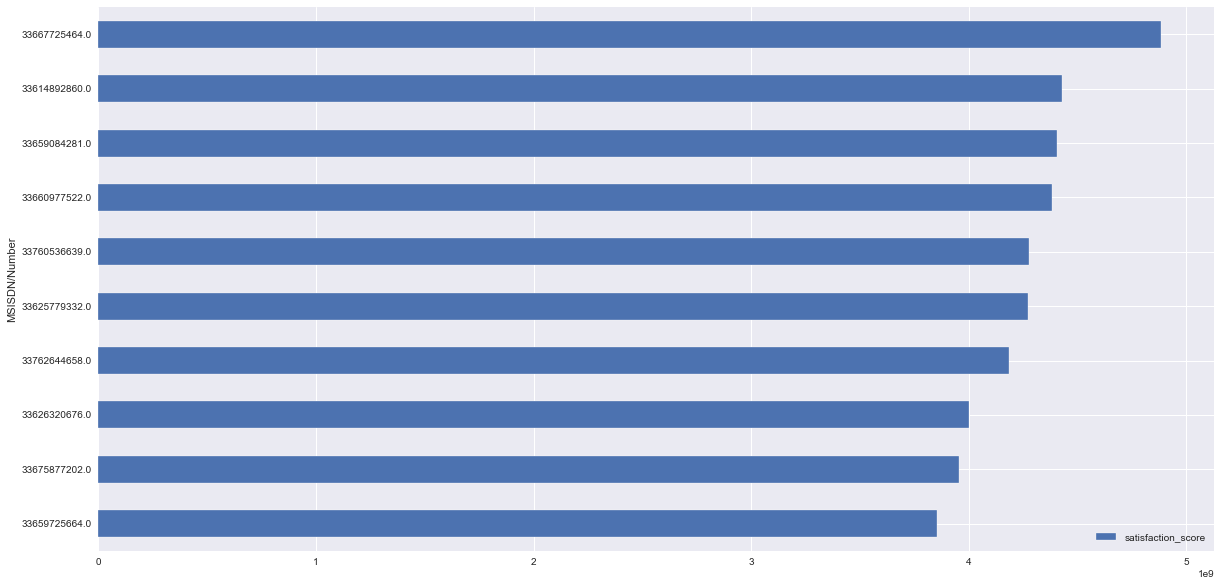

In [153]:
top_10_satisfied_customers.plot(kind="barh", figsize=(20, 10), x="MSISDN/Number", y="satisfaction_score").invert_yaxis()

In [154]:
satisfaction_kmeans = KMeans(n_clusters=2)
satisfaction_kmeans.fit_predict(satisfaction[["eng_score", "exp_score"]])

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

In [155]:
satisfaction["Cluster"] = satisfaction_kmeans.labels_

In [156]:
satisfaction

,eng_score,exp_score,MSISDN/Number,satisfaction_score,Cluster
0,47203688.08,831771975.42,33601001722.0,439487831.75,1
1,674627249.81,831771952.43,33601001754.0,753199601.12,0
2,235520408.58,831771954.41,33601002511.0,533646181.50,1
3,409166203.40,831487013.76,33601007832.0,620326608.58,1
4,625924060.88,832013331.88,33601008617.0,728968696.38,0
...,...,...,...,...,...
106466,116845323.90,831476566.86,33789996170.0,474160945.38,1
106467,351179556.54,831771935.43,33789997247.0,591475745.99,1
106468,599363374.45,831772050.38,3197020876596.0,715567712.41,0
106469,235199094.82,831772018.39,337000037000919.0,533485556.61,1


In [157]:
satisfation_agg = satisfaction.groupby(by="Cluster").agg({"eng_score": "sum", "exp_score": "sum"})

In [158]:
satisfation_agg

,eng_score,exp_score
Cluster,,
0,27976435631778.71,33913941544090.95
1,12962371326374.84,55290351344159.85


In [159]:
final_table = satisfaction[["MSISDN/Number", "eng_score", "exp_score", "satisfaction_score"]]

In [160]:
final_table

,MSISDN/Number,eng_score,exp_score,satisfaction_score
0,33601001722.0,47203688.08,831771975.42,439487831.75
1,33601001754.0,674627249.81,831771952.43,753199601.12
2,33601002511.0,235520408.58,831771954.41,533646181.50
3,33601007832.0,409166203.40,831487013.76,620326608.58
4,33601008617.0,625924060.88,832013331.88,728968696.38
...,...,...,...,...
106466,33789996170.0,116845323.90,831476566.86,474160945.38
106467,33789997247.0,351179556.54,831771935.43,591475745.99
106468,3197020876596.0,599363374.45,831772050.38,715567712.41
106469,337000037000919.0,235199094.82,831772018.39,533485556.61
